In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

## データ読み込み


In [2]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [0]:
tmp_data = pd.DataFrame(iris.data, columns=iris.feature_names)
tmp_data["target"] = iris.target

In [0]:
data_iris = tmp_data[tmp_data['target'] <= 1]

In [5]:
print(data_iris.head())
print(data_iris.shape)

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]
(100, 5)


## 可視化

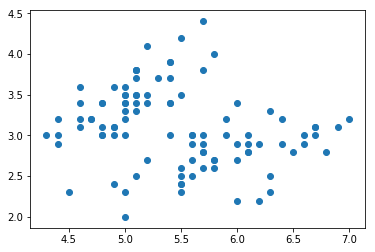

In [6]:
plt.scatter(data_iris.iloc[:, 0], data_iris.iloc[:, 1])

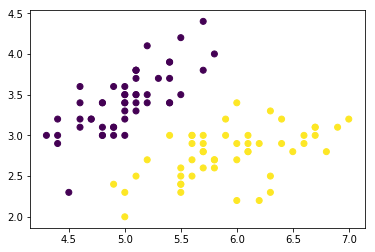

In [7]:
plt.scatter(data_iris.iloc[:, 0], data_iris.iloc[:, 1], c=data_iris["target"])

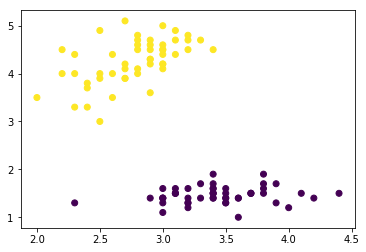

In [8]:
plt.scatter(data_iris.iloc[:, 1], data_iris.iloc[:, 2], c=data_iris["target"])

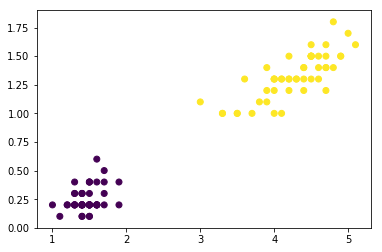

In [9]:
plt.scatter(data_iris.iloc[:, 2], data_iris.iloc[:, 3], c=data_iris["target"])

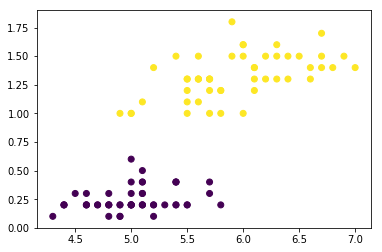

In [10]:
plt.scatter(data_iris.iloc[:, 0], data_iris.iloc[:, 3], c=data_iris["target"])

## ロジスティック回帰を実践

In [0]:
logit = LogisticRegression()

In [12]:
x_column_list = ['sepal length (cm)']
y_column_list = ['target']

x = data_iris[x_column_list]
y = data_iris[y_column_list]

logit.fit(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
print(logit.coef_)
print(logit.intercept_)

[[0.58776499]]
[-3.08609863]


### 複数の説明変数で実践

In [14]:
data_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [15]:
logit_multi = LogisticRegression()

x_column_list = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
y_column_list = ['target']

x = data_iris[x_column_list]
y = data_iris[y_column_list]

logit_multi.fit(x, y)

print(logit_multi.coef_)
print(logit_multi.intercept_)

[[-0.40247392 -1.46382925  2.23785648  1.00009294]]
[-0.25906453]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 予測

In [0]:
x_column_list = ['sepal width (cm)']
y_column_list = ['target']

X_train, X_test, y_train, y_test = train_test_split(data_iris[x_column_list], data_iris[y_column_list], test_size=0.2)

In [18]:
logit2 = LogisticRegression()
logit2.fit(X_train, y_train)

print(logit2.coef_)
print(logit2.intercept_)

[[-0.9795792]]
[2.95779747]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
y_pred = logit2.predict(X_test)
print(y_pred)

[0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1]


In [20]:
print(accuracy_score(y_test, y_pred))

0.65


### 複数の説明変数で実践

In [0]:
x_column_list = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
y_column_list = ['target']

X_train, X_test, y_train, y_test = train_test_split(data_iris[x_column_list], data_iris[y_column_list], test_size=0.2)

In [23]:
logit_multi2 = LogisticRegression()
logit_multi2.fit(X_train, y_train)

print(logit_multi2.coef_)
print(logit_multi2.intercept_)

[[-0.39583113 -1.38807927  2.11861743  0.94690863]]
[-0.25630318]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
y_pred = logit_multi2.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0
